In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

import glob

setGPU: Setting GPU to: 1


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from plots import loadModel, getMetric

In [6]:
n_samples = 200

f = h5py.File('/bigdata/shared/HGCAL_data/single_particle/noPU/ntuple_merged_2512_no_pu.h5', 'r')
X = np.asarray(f['image'])
#X = X.squeeze()

In [7]:
X.shape

(31, 16, 16, 55)

In [113]:
def getMeans(X, axis):
    y_means = np.mean(X, axis=axis)
    y_means = np.sum(y_means, axis=(1, 2))
    y_means_mean = np.mean(y_means)
    y_means_var = np.var(y_means)
    return y_means_mean, y_means_var

In [114]:
x_means_mean, x_means_var = getMeans(X, axis=1)
y_means_mean, y_means_var = getMeans(X, axis=2)
z_means_mean, z_means_var = getMeans(X, axis=3)

In [ ]:
print(x_means_mean, x_means_var)
print(y_means_mean, y_means_var)
print(z_means_mean, z_means_var)

In [115]:
def getStds(X, axis):
    y_means = np.std(X, axis=axis)
    y_means = np.sum(y_means, axis=(1, 2))
    y_means_mean = np.mean(y_means)
    y_means_var = np.var(y_means)
    return y_means_mean, y_means_var

In [116]:
x_stds_mean, x_stds_var = getStds(X, axis=1)
y_stds_mean, y_stds_var = getStds(X, axis=2)
z_stds_mean, z_stds_var = getStds(X, axis=3)

In [ ]:
print(x_stds_mean, x_stds_var)
print(y_stds_mean, y_stds_var)
print(z_stds_mean, z_stds_var)

In [ ]:
from scipy.stats import skew

def get3rt(x_skews):
    x_skews3rt = []
    for s in x_skews:
        s3rt = s**(1/float(3))
        x_skews3rt.append(s3rt)
    return x_skews3rt

In [53]:
def get4rt(x_skews):
    x_skews4rt = []
    for s in x_skews:
        s4rt = s**(1/float(4))
        x_skews4rt.append(s3rt)
    return x_skews4rt

In [117]:
def getSkews(X, axis):
    x_skews = skew(X, axis=axis)
    x_skews = np.sum(x_skews, axis=(1, 2))
    x_skews3rt = get3rt(x_skews)
    x_skews_mean = np.mean(x_skews3rt)
    x_skews_var = np.var(x_skews3rt)
    return x_skews_mean, x_skews_var

In [118]:
x_skews_mean, x_skews_var = getSkews(X, axis=1)
y_skews_mean, y_skews_var = getSkews(X, axis=2)
z_skews_mean, z_skews_var = getSkews(X, axis=3)

In [66]:
print(x_skews_mean, x_skews_var)
print(y_skews_mean, y_skews_var)
print(z_skews_mean, z_skews_var)

10.445481356913728 0.06648592313296102


In [67]:
from scipy.stats import kurtosis

In [119]:
def getKurts(X, axis):
    x_skews = kurtosis(X, axis=axis)
    x_skews = np.sum(x_skews, axis=(1, 2))
    x_skews4rt = get4rt(x_skews)
    x_skews_mean = np.mean(x_skews4rt)
    x_skews_var = np.var(x_skews4rt)
    return x_skews_mean, x_skews_var

In [120]:
x_kurt_mean, x_kurt_var = getKurts(X, axis=1)
y_kurt_mean, y_kurt_var = getKurts(X, axis=2)
z_kurt_mean, z_kurt_var = getKurts(X, axis=3)

In [72]:
print(x_kurt_mean, x_kurt_var)
print(y_kurt_mean, y_kurt_var)
print(z_kurt_mean, z_kurt_var)

6.058137669703241 0.10323311898759885


In [121]:
x_means = (x_means_mean, x_stds_mean, x_skews_mean, x_kurt_mean)
y_means = (y_means_mean, y_stds_mean, y_skews_mean, y_kurt_mean)
z_means = (z_means_mean, z_stds_mean, z_skews_mean, z_kurt_mean)

x_vars = (x_means_var, x_stds_var, x_skews_var, x_kurt_var)
y_vars = (y_means_var, y_stds_var, y_skews_var, y_kurt_var)
z_vars = (z_means_var, z_stds_var, z_skews_var, z_kurt_var)

In [125]:
def getValues(X):
    x_means_mean, x_means_var = getMeans(X, axis=1)
    y_means_mean, y_means_var = getMeans(X, axis=2)
    z_means_mean, z_means_var = getMeans(X, axis=3)
    
    x_stds_mean, x_stds_var = getStds(X, axis=1)
    y_stds_mean, y_stds_var = getStds(X, axis=2)
    z_stds_mean, z_stds_var = getStds(X, axis=3)
    
    x_skews_mean, x_skews_var = getSkews(X, axis=1)
    y_skews_mean, y_skews_var = getSkews(X, axis=2)
    z_skews_mean, z_skews_var = getSkews(X, axis=3)
    
    x_kurt_mean, x_kurt_var = getKurts(X, axis=1)
    y_kurt_mean, y_kurt_var = getKurts(X, axis=2)
    z_kurt_mean, z_kurt_var = getKurts(X, axis=3)
    
    x_means = (x_means_mean, x_stds_mean, x_skews_mean, x_kurt_mean)
    y_means = (y_means_mean, y_stds_mean, y_skews_mean, y_kurt_mean)
    z_means = (z_means_mean, z_stds_mean, z_skews_mean, z_kurt_mean)

    x_vars = (x_means_var, x_stds_var, x_skews_var, x_kurt_var)
    y_vars = (y_means_var, y_stds_var, y_skews_var, y_kurt_var)
    z_vars = (z_means_var, z_stds_var, z_skews_var, z_kurt_var)
    
    means = [x_means, y_means, z_means]
    variances = [x_vars, y_vars, z_vars]
    
    return means, variances

In [126]:
real_means, real_variances = getValues(X)

In [128]:
print(real_means)

[(21.35096331079577, 57.15394286494975, 10.445481356913728, 6.058137669703241), (21.35096331079577, 57.519036081783284, 10.150160173800932, 5.6244533849990015), (6.21118932677695, 12.987266243165497, 10.393586104683322, 8.809572502195552)]


In [129]:
real_means[0]

(21.35096331079577, 57.15394286494975, 10.445481356913728, 6.058137669703241)

# Generated model

In [133]:
gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.json'
g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_weights_epoch_1975_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01.h5'

In [132]:
g = loadModel(gen_model2)

Using TensorFlow backend.


In [134]:
g.load_weights(g_weight2)

In [135]:
latent_space=100
noise = np.random.normal(0, 1, (n_samples, latent_space))
generated_images = g.predict(noise)

In [137]:
gen_means, gen_variances = getValues(generated_images)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


In [138]:
gen_means

[(17.619482, 44.75483, 9.537567629748757, nan),
 (17.619482, 49.20205, 9.1201189466989, nan),
 (5.1256676, 9.539216, 9.345555704010238, 8.24635462614802)]

In [139]:
gen_variances

[(36.40238, 190.59827, 0.11858941470138053, nan),
 (36.402378, 350.87433, 0.19429514030963982, nan),
 (3.0806644, 7.619668, 0.08060175747151767, 0.04693600884458367)]

In [147]:
sum2 = 0
sum1 = 0
for i in range(2):
    sum2 += sum1
    sum1 = 0
    for j in range(3):
        sum1 += (gen_means[i][j] - real_means[i][j]) / (gen_variances[i][j] + real_variances[i][j])

In [148]:
sum2

-4.937375891939011

In [157]:
def getSum(real_means, real_variances, gen_means, gen_variances):
    sum2 = 0
    sum1 = 0
    for i in range(2):
        sum2 += sum1
        sum1 = 0
        for j in range(3):
            sum1 += (gen_means[i][j] - real_means[i][j]) / (gen_variances[i][j] + real_variances[i][j])
    
    return sum2

In [158]:
s = getSum(real_means, real_variances, gen_means, gen_variances)

In [159]:
s

-4.937375891939011

In [160]:
def sums(inp, all_g_weight, gen_model, n_samples=200):
    g = loadModel(gen_model)
    latent_space=100
    noise = np.random.normal(0, 1, (n_samples, latent_space))
    
    sums = []

    for w in glob.glob(all_g_weight):
        epoch = w.split('/')[-1].split('_')[3]
        g.load_weights(w)
        generated_images = g.predict(noise)
        
        real_means, real_variances = getValues(inp)
        gen_means, gen_variances = getValues(generated_images)
        
        s = getSum(real_means, real_variances, gen_means, gen_variances)
        sums.append(s)
        
    return sums

In [161]:
all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial28/weights/generator_weights_epoch_*.h5'

In [162]:
ss = sums(X, all_g_weight2, gen_model2)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in power
  after removing the cwd from sys.path.


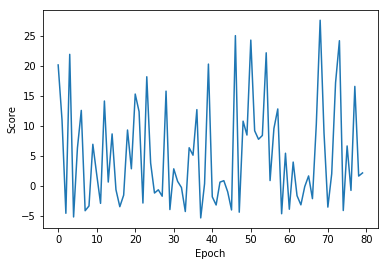

In [165]:
plt.plot(ss)
plt.xlabel("Epoch")
plt.ylabel("Score")